<a href="https://colab.research.google.com/github/ansehoon1999/DataCampusProject/blob/main/2_%EC%83%81%EA%B4%80%EB%B6%84%EC%84%9D%2C_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%2C_MCLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression Analysis

In [4]:
pip install geopandas

     |████████████████████████████████| 994 kB 4.2 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 
     |████████████████████████████████| 6.6 MB 43.2 MB/s 


In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import numpy as np
import pandas as pd

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sc_data_m = pd.read_excel("/content/drive/MyDrive/데청캠/상관분석, 회귀분석, MCLP/sc_data_m.xlsx", index_col=0)

In [5]:
import geopandas as gpd
robot_gu = gpd.read_file("/content/drive/MyDrive/데청캠/상관분석, 회귀분석, MCLP/서울시 회수로봇이 있는 구만/서울시 구_회수로봇_좌표.shp")

In [6]:
sc_data_m

,left,bottom,right,top,거주인구,utmk_x,utmk_y,배달인구_평균,유동인구_평균,1인가구,sc_거주인구,sc_유동인구_평균,sc_배달인구_평균,sc_1인가구,xcoord,ycoord,네프론,위빈,Sssaem,공공시설,공원,역,회수합,sc_공원,sc_역
0,935000,1950800,935100,1950900,0.0,935050,1950850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.764657,37.554709,0,0,0,0,0,0,0,0.0,0.0
1,935000,1950900,935100,1951000,0.0,935050,1950950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.764649,37.555611,0,0,0,0,0,0,0,0.0,0.0
2,935100,1950700,935200,1950800,0.0,935150,1950750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.765798,37.553815,0,0,0,0,0,0,0,0.0,0.0
3,935100,1950800,935200,1950900,0.0,935150,1950850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.765789,37.554716,0,0,0,0,0,0,0,0.0,0.0
4,935100,1950900,935200,1951000,0.0,935150,1950950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.765781,37.555618,0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61645,972000,1949500,972100,1949600,0.0,972050,1949550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.183599,37.544858,0,0,0,0,0,0,0,0.0,0.0
61646,972000,1949600,972100,1949700,0.0,972050,1949650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.183595,37.545759,0,0,0,0,0,0,0,0.0,0.0
61647,972000,1949900,972100,1950000,0.0,972050,1949950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.183584,37.548463,0,0,0,0,0,0,0,0.0,0.0
61648,972000,1950100,972100,1950200,0.0,972050,1950150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.183576,37.550266,0,0,0,0,0,0,0,0.0,0.0


In [7]:
robot_gu

,left,bottom,right,top,xcoord,ycoord,BASE_DATE,SIGUNGU_CD,SIGUNGU_NM,geometry
0,935100.0,1950900.0,935200.0,1951000.0,126.765781,37.555618,20200630,11160,강서구,MULTIPOINT (126.76578 37.55562)
1,935200.0,1950800.0,935300.0,1950900.0,126.766922,37.554723,20200630,11160,강서구,MULTIPOINT (126.76692 37.55472)
2,935200.0,1950900.0,935300.0,1951000.0,126.766913,37.555625,20200630,11160,강서구,MULTIPOINT (126.76691 37.55562)
3,935200.0,1951000.0,935300.0,1951100.0,126.766904,37.556526,20200630,11160,강서구,MULTIPOINT (126.76690 37.55653)
4,935300.0,1950500.0,935400.0,1950600.0,126.768080,37.552027,20200630,11160,강서구,MULTIPOINT (126.76808 37.55203)
...,...,...,...,...,...,...,...,...,...,...
35165,971900.0,1949800.0,972000.0,1949900.0,127.182456,37.547559,20200630,11250,강동구,MULTIPOINT (127.18246 37.54756)
35166,971900.0,1949900.0,972000.0,1950000.0,127.182452,37.548460,20200630,11250,강동구,MULTIPOINT (127.18245 37.54846)
35167,971900.0,1950000.0,972000.0,1950100.0,127.182448,37.549361,20200630,11250,강동구,MULTIPOINT (127.18245 37.54936)
35168,971900.0,1950100.0,972000.0,1950200.0,127.182444,37.550263,20200630,11250,강동구,MULTIPOINT (127.18244 37.55026)


In [8]:
robot_gu['left'] = robot_gu['left'].round().astype('int64')
robot_gu['bottom'] = robot_gu['bottom'].round().astype('int64')
robot_gu['right'] = robot_gu['right'].round().astype('int64')
robot_gu['top'] = robot_gu['top'].round().astype('int64')

In [10]:
robot_gu = robot_gu.drop(["xcoord","ycoord","BASE_DATE","geometry"],axis=1)

In [12]:
robot_gu_m = pd.merge(robot_gu,sc_data_m,on=["left","bottom","right","top"], how="left")
robot_gu_m

,left,bottom,right,top,SIGUNGU_CD,SIGUNGU_NM,거주인구,utmk_x,utmk_y,배달인구_평균,유동인구_평균,1인가구,sc_거주인구,sc_유동인구_평균,sc_배달인구_평균,sc_1인가구,xcoord,ycoord,네프론,위빈,Sssaem,공공시설,공원,역,회수합,sc_공원,sc_역
0,935100,1950900,935200,1951000,11160,강서구,0.0,935150,1950950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.765781,37.555618,0,0,0,0,0,0,0,0.0,0.0
1,935200,1950800,935300,1950900,11160,강서구,0.0,935250,1950850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.766922,37.554723,0,0,0,0,0,0,0,0.0,0.0
2,935200,1950900,935300,1951000,11160,강서구,0.0,935250,1950950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.766913,37.555625,0,0,0,0,0,0,0,0.0,0.0
3,935200,1951000,935300,1951100,11160,강서구,0.0,935250,1951050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.766904,37.556526,0,0,0,0,0,0,0,0.0,0.0
4,935300,1950500,935400,1950600,11160,강서구,0.0,935350,1950550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.768080,37.552027,0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35165,971900,1949800,972000,1949900,11250,강동구,0.0,971950,1949850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.182456,37.547559,0,0,0,0,0,0,0,0.0,0.0
35166,971900,1949900,972000,1950000,11250,강동구,0.0,971950,1949950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.182452,37.548460,0,0,0,0,0,0,0,0.0,0.0
35167,971900,1950000,972000,1950100,11250,강동구,0.0,971950,1950050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.182448,37.549361,0,0,0,0,0,0,0,0.0,0.0
35168,971900,1950100,972000,1950200,11250,강동구,0.0,971950,1950150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.182444,37.550263,0,0,0,0,0,0,0,0.0,0.0


In [17]:
### robot_gu_m.to_excel("robotgu_sc_data_m.xlsx")

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [19]:
df_LR = robot_gu_m.copy()
X = df_LR[["sc_거주인구","sc_유동인구_평균","sc_배달인구_평균","sc_1인가구","sc_공원","sc_역"]]
y = df_LR["회수합"]

In [20]:
X.corr()

,sc_거주인구,sc_유동인구_평균,sc_배달인구_평균,sc_1인가구,sc_공원,sc_역
sc_거주인구,1.000000,0.069447,0.735314,0.504879,-0.038366,0.044830
sc_유동인구_평균,0.069447,1.000000,0.083842,0.088274,0.006012,0.044085
sc_배달인구_평균,0.735314,0.083842,1.000000,0.677366,-0.047543,0.074485
sc_1인가구,0.504879,0.088274,0.677366,1.000000,-0.048170,0.126061
sc_공원,-0.038366,0.006012,-0.047543,-0.048170,1.000000,0.037065
sc_역,0.044830,0.044085,0.074485,0.126061,0.037065,1.000000


In [21]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print(regr.coef_)

[ 0.10433166 -0.13200708  0.63602281  0.37473875  0.2143527   0.39891326]


------------------------------

In [23]:
# 안넣을거임
X = sm.add_constant(X)
ols = sm.OLS(y,X)
result = ols.fit()

In [24]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    회수합   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     229.0
Date:                Tue, 24 Aug 2021   Prob (F-statistic):          4.60e-288
Time:                        06:15:21   Log-Likelihood:                -24622.
No. Observations:               35170   AIC:                         4.926e+04
Df Residuals:                   35163   BIC:                         4.932e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0877      0.003     25.181      0.0

-------------------------------------------------

## MCLP

In [25]:
!pip install mip

     |████████████████████████████████| 48.0 MB 50 kB/s 


In [26]:
import numpy as np
import pandas as pd
import time
from scipy.spatial import distance_matrix

##########################    mclp    ###########################
#######input
#points -> 커버해야할 포인트들(2차원 nparray). ex) [[0,0], [127,127]]
#K -> 설치할 기기의 수(int)
#radius -> 한 기기당 커버 가능한 범위
#w -> 포인트들의 중요도(wight) 벡터
#sites -> 설치가 가능한 위치

#######output
#opt_sites
#m.objective_value
#################################################################
def mclp(points:np.ndarray, K, radius, w, sites:np.ndarray):
    """
    Solve maximum covering location problem
    Input:
        points: input points, Numpy array in shape of [N,2]
        K: the number of sites to select
        radius: the radius of circle
        M: the number of candidate sites, which will randomly generated inside
        the ConvexHull wrapped by the polygon
    Return:
        opt_sites: locations K optimal sites, Numpy array in shape of [K,2]
        f: the optimal value of the objective function
    """
    print('----- Configurations -----')
    print('  Number of points %g' % points.shape[0])
    print('  K %g' % K)
    print('  Radius %g' % radius)

    start = time.time()
    J = sites.shape[0]
    I = points.shape[0]
    D = distance_matrix(points,sites)
    mask1 = D<=radius
    D[mask1]=1
    D[~mask1]=0

    from mip import Model, xsum, maximize, BINARY

    # Build model
    m:Model = Model("mclp")

    # Add variables
    x = [m.add_var(name = "x%d" % j, var_type = BINARY) for j in range(J)]
    y = [m.add_var(name = "y%d" % i, var_type = BINARY) for i in range(I)]

    m.objective = maximize(xsum(w[i]*y[i] for i in range (I)))

    m += xsum(x[j] for j in range(J)) == K

    for i in range(I):
        m += xsum(x[j] for j in np.where(D[i]==1)[0]) >= y[i]

    m.optimize()

    end = time.time()
    print('----- Output -----')
    print('  Running time : %s seconds' % float(end-start))
    print('  Optimal coverage points: %g' % m.objective_value)

    solution = []
    for i in range(J):
        if x[i].x ==1:
            solution.append(int(x[i].name[1:]))
    opt_sites = sites[solution]

    return opt_sites, m.objective_value

def plot_input(points):
    '''
    Plot the result
    Input:
        points: input points, Numpy array in shape of [N,2]
        opt_sites: locations K optimal sites, Numpy array in shape of [K,2]
        radius: the radius of circle
    '''
    from matplotlib import pyplot as plt
    fig = plt.figure(figsize=(8,8))
    plt.scatter(points[:,0],points[:,1],c='C0')
    ax = plt.gca()
    ax.axis('equal')
    ax.tick_params(axis='both',left=False, top=False, right=False,
                       bottom=False, labelleft=False, labeltop=False,
                       labelright=False, labelbottom=False)
    plt.show()

def plot_result(points,opt_sites,radius):
    '''
    Plot the result
    Input:
        points: input points, Numpy array in shape of [N,2]
        opt_sites: locations K optimal sites, Numpy array in shape of [K,2]
        radius: the radius of circle
    '''
    from matplotlib import pyplot as plt
    fig = plt.figure(figsize=(8,8))
    plt.scatter(points[:,0],points[:,1],c='C0')
    ax = plt.gca()
    plt.scatter(opt_sites[:,0],opt_sites[:,1],c='C1',marker='+')
    for site in opt_sites:
        circle = plt.Circle(site, radius, color='C1',fill=False,lw=2)
        ax.add_artist(circle)
    ax.axis('equal')
    ax.tick_params(axis='both',left=False, top=False, right=False,
                       bottom=False, labelleft=False, labeltop=False,
                       labelright=False, labelbottom=False)
    plt.show()

In [29]:
mclp_data = pd.read_excel("/content/drive/MyDrive/데청캠/2. 상관분석, 회귀분석, MCLP/sc_data_m.xlsx",index_col=0)

In [30]:
mclp_data

,left,bottom,right,top,거주인구,utmk_x,utmk_y,배달인구_평균,유동인구_평균,1인가구,sc_거주인구,sc_유동인구_평균,sc_배달인구_평균,sc_1인가구,xcoord,ycoord,네프론,위빈,Sssaem,공공시설,공원,역,회수합,sc_공원,sc_역
0,935000,1950800,935100,1950900,0.0,935050,1950850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.764657,37.554709,0,0,0,0,0,0,0,0.0,0.0
1,935000,1950900,935100,1951000,0.0,935050,1950950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.764649,37.555611,0,0,0,0,0,0,0,0.0,0.0
2,935100,1950700,935200,1950800,0.0,935150,1950750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.765798,37.553815,0,0,0,0,0,0,0,0.0,0.0
3,935100,1950800,935200,1950900,0.0,935150,1950850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.765789,37.554716,0,0,0,0,0,0,0,0.0,0.0
4,935100,1950900,935200,1951000,0.0,935150,1950950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.765781,37.555618,0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61645,972000,1949500,972100,1949600,0.0,972050,1949550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.183599,37.544858,0,0,0,0,0,0,0,0.0,0.0
61646,972000,1949600,972100,1949700,0.0,972050,1949650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.183595,37.545759,0,0,0,0,0,0,0,0.0,0.0
61647,972000,1949900,972100,1950000,0.0,972050,1949950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.183584,37.548463,0,0,0,0,0,0,0,0.0,0.0
61648,972000,1950100,972100,1950200,0.0,972050,1950150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.183576,37.550266,0,0,0,0,0,0,0,0.0,0.0


In [34]:
# 회귀분석을 통해 얻은 각 변수들의 coef값을 weights에 할당
columns = ["sc_거주인구","sc_유동인구_평균","sc_배달인구_평균","sc_1인가구","sc_공원","sc_역"]
weights = [ 0.10433166, -0.13200708,  0.63602281,  0.37473875,  0.2143527,   0.39891326]

In [35]:
score = 0
for col, weight in zip(columns, weights):
  score+=mclp_data[col]*weight

In [36]:
mclp_data['입지점수'] = score
mclp_data

,left,bottom,right,top,거주인구,utmk_x,utmk_y,배달인구_평균,유동인구_평균,1인가구,sc_거주인구,sc_유동인구_평균,sc_배달인구_평균,sc_1인가구,xcoord,ycoord,네프론,위빈,Sssaem,공공시설,공원,역,회수합,sc_공원,sc_역,입지점수
0,935000,1950800,935100,1950900,0.0,935050,1950850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.764657,37.554709,0,0,0,0,0,0,0,0.0,0.0,0.0
1,935000,1950900,935100,1951000,0.0,935050,1950950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.764649,37.555611,0,0,0,0,0,0,0,0.0,0.0,0.0
2,935100,1950700,935200,1950800,0.0,935150,1950750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.765798,37.553815,0,0,0,0,0,0,0,0.0,0.0,0.0
3,935100,1950800,935200,1950900,0.0,935150,1950850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.765789,37.554716,0,0,0,0,0,0,0,0.0,0.0,0.0
4,935100,1950900,935200,1951000,0.0,935150,1950950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.765781,37.555618,0,0,0,0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61645,972000,1949500,972100,1949600,0.0,972050,1949550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.183599,37.544858,0,0,0,0,0,0,0,0.0,0.0,0.0
61646,972000,1949600,972100,1949700,0.0,972050,1949650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.183595,37.545759,0,0,0,0,0,0,0,0.0,0.0,0.0
61647,972000,1949900,972100,1950000,0.0,972050,1949950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.183584,37.548463,0,0,0,0,0,0,0,0.0,0.0,0.0
61648,972000,1950100,972100,1950200,0.0,972050,1950150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.183576,37.550266,0,0,0,0,0,0,0,0.0,0.0,0.0


In [37]:
facilities = pd.read_csv("/content/drive/MyDrive/데청캠/2. 상관분석, 회귀분석, MCLP/BULD_공공시설.csv")

In [38]:
facilities

,xcoord,ycoord
0,127.016343,37.570719
1,127.015628,37.577823
2,126.984789,37.580051
3,126.981857,37.585005
4,126.970621,37.584092
...,...,...
533,126.855803,37.524560
534,126.881717,37.537183
535,127.010860,37.587939
536,127.068523,37.658812


In [39]:
sites = np.asarray([[xcoord, ycoord] for xcoord, ycoord in zip(facilities['xcoord'], facilities['ycoord']) ])

-----------------코드 미제출 ---------------------

In [40]:
points = np.asarray([[xcoord, ycoord] for xcoord, ycoord in zip(mclp_data['xcoord'], mclp_data['ycoord']) ])

In [41]:
K = 50 # 25대 50대 100대
radius = (1/88.74/1000)*500 # covered distance 500m
w = mclp_data['입지점수'] 

opt_sites,f = mclp(points, K, radius, w, sites)
print(f)

----- Configurations -----
  Number of points 61650
  K 50
  Radius 0.00563444
----- Output -----
  Running time : 41.399089097976685 seconds
  Optimal coverage points: 945.837
945.837182868997


In [ ]:
K = 50 # 25대 50대 100대
radius = (1/88.74/1000)*700 # covered distance 700m
w = mclp_data['입지점수'] 

opt_sites,f = mclp(points, K, radius, w, sites)
print(f)

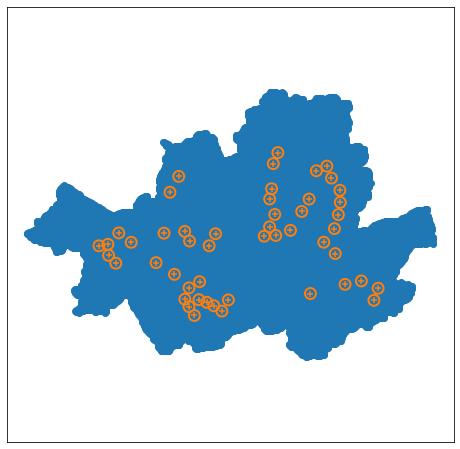

In [42]:
# 50, 500
plot_result(points,opt_sites,radius)

In [ ]:
# 50, 500
plot_result(points,opt_sites,radius)

-------------------------------------------

In [44]:
notcovered = mclp_data[mclp_data['회수합']==0 ]

In [45]:
points = np.asarray([[xcoord, ycoord] for xcoord, ycoord in zip(notcovered['xcoord'], notcovered['ycoord']) ])

In [46]:
K = 50 # 25대 50대 100대
radius = (1/88.74/1000)*500 # covered distance 500m
w = mclp_data['입지점수'] 

opt_sites,f = mclp(points, K, radius, w, sites)
print(f)

----- Configurations -----
  Number of points 56895
  K 50
  Radius 0.00563444
----- Output -----
  Running time : 9.590897798538208 seconds
  Optimal coverage points: 656.359
656.35878744356


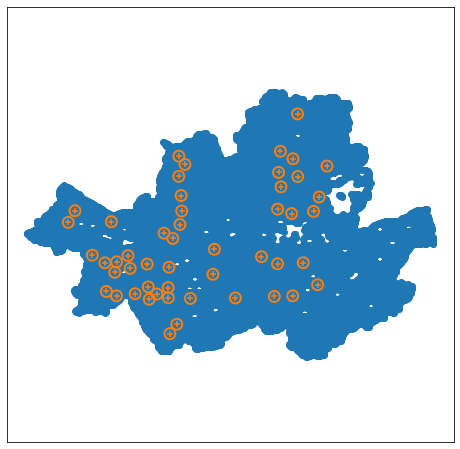

In [47]:
# 50, 500
plot_result(points,opt_sites,radius)